### CLASSIFICATION REGRESSION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import (confusion_matrix, classification_report, 
                             accuracy_score, roc_curve, roc_auc_score)
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Charger les donné


In [2]:
df = pd.read_csv('data/clean_data_training')

In [3]:
df.head()

,SO2,CO,O3,O3_8hr,PM10,PM2.5,NO2,NOx,NO,WindSpeed,WindDirec,DataCreationDate,CO_8hr,PM2.5_AVG,PM10_AVG,SO2_AVG,AQI,Pollutant
0,5.2,0.37,50.0,80,51,29,19.0,21.0,1.6,2.1,E,9/28/2017 16:00,0.5,37,60,5,128.0,1
1,4.6,0.25,72.0,68,46,21,12.0,14.0,1.2,3.7,N,9/28/2017 16:00,0.4,30,57,5,100.0,1
2,3.8,0.29,74.0,59,56,39,7.7,8.8,1.1,2.4,W,9/28/2017 15:00,0.4,32,55,4,96.0,1
3,1.8,0.17,51.0,50,36,23,3.3,4.8,1.5,2.7,W,9/28/2017 15:00,0.3,27,44,2,83.0,1
4,2.6,0.12,33.0,31,33,22,4.5,5.4,1.0,2.7,W,9/28/2017 15:00,0.2,22,39,3,75.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70792 entries, 0 to 70791
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SO2               70792 non-null  float64
 1   CO                70792 non-null  float64
 2   O3                70792 non-null  float64
 3   O3_8hr            70792 non-null  int64  
 4   PM10              70792 non-null  int64  
 5   PM2.5             70792 non-null  int64  
 6   NO2               70792 non-null  float64
 7   NOx               70792 non-null  float64
 8   NO                70792 non-null  float64
 9   WindSpeed         70792 non-null  float64
 10  WindDirec         70792 non-null  object 
 11  DataCreationDate  70792 non-null  object 
 12  CO_8hr            70792 non-null  float64
 13  PM2.5_AVG         70792 non-null  int64  
 14  PM10_AVG          70792 non-null  int64  
 15  SO2_AVG           70792 non-null  int64  
 16  AQI               70792 non-null  float6

In [5]:
# Définition des colonnes
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Pollutant')
cat_cols = ['WindDirec']


In [8]:
# Séparer X et y, encoder les catégorielles
X = df.drop(['Pollutant', 'DataCreationDate'], axis=1)  # retirer la date
X = pd.get_dummies(X, columns=['WindDirec'], drop_first=True)
y = df['Pollutant']


# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
# Évaluer le modèle
print("Précision :", model.score(X_test, y_test))

Précision : 0.9371424535631048


In [15]:
non_numeric = X.select_dtypes(include=['object']).columns
print(non_numeric)


Index([], dtype='object')


In [ ]:
import statsmodels.api as sm

# On retire la colonne date et on encode la catégorielle
X = df.drop(['Pollutant', 'DataCreationDate'], axis=1)
X = pd.get_dummies(X, columns=['WindDirec'], drop_first=True)
y = df['Pollutant']

# Ajouter la constante
X = sm.add_constant(X)

# Modèle logit
model = sm.Logit(y, X).fit()
print(model.summary())


In [ ]:
from sklearn.preprocessing import StandardScaler
# Séparer features / target
X = df.drop(['Pollutant', 'DataCreationDate'], axis=1)
X = pd.get_dummies(X, columns=['WindDirec'], drop_first=True)
y = df['Pollutant']

# Optionnel : standardiser
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegressionCV

lasso = LogisticRegressionCV(
    penalty='l1',       # L1 = Lasso
    solver='liblinear', # nécessaire pour L1
    cv=5,               # 5-fold cross-validation
    max_iter=200
).fit(X_train_transformed, y_train)

In [20]:
# Score sur test
score = lasso.score(X_test_transformed, y_test)
print("Précision sur le test :", score)

# Coefficients du modèle
coefficients = pd.Series(lasso.coef_[0], index=X_train.columns)
print(coefficients.sort_values())


Précision sur le test : 0.9457588812769263
PM2.5         -0.139159
WindSpeed     -0.047690
CO_8hr        -0.037136
NO            -0.034736
CO            -0.028336
PM10           0.000000
NO2            0.002036
SO2            0.003688
WindDirec_S    0.016262
WindDirec_W    0.033022
SO2_AVG        0.036585
WindDirec_N    0.046609
O3             0.077456
O3_8hr         0.108847
NOx            0.109662
PM10_AVG       0.155628
PM2.5_AVG      2.477458
AQI            2.570510
dtype: float64


## Variables most important. 

- `SO2` 0.004 = Weak but positive effect
- `PM10_AVG` 0.156 = Average PM10 → higher probability
- `PM2.5_AVG` 2.477 =  Very strong impact → Average PM2.5 very influential
- `AQI 2.571` AQI = has the strongest impact on the probability

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LassoCV avec 5 folds par défaut, ajuste automatiquement les alphas
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Alpha optimal trouvé par CV
alpha_optimal = lasso_cv.alpha_
print(f"Alpha optimal trouvé par LassoCV : {alpha_optimal:.5f}")


Alpha optimal trouvé par LassoCV : 0.00034


In [28]:
from sklearn.metrics import mean_squared_error

# Prédire sur les données test
y_pred = lasso_cv.predict(X_test_scaled)

# Calculer le MSE
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

print(f"MSE sur le jeu test : {mse_test:.4f}")
print(f"RMSE sur le jeu test : {rmse_test:.4f}")


MSE sur le jeu test : 0.1270
RMSE sur le jeu test : 0.3564


## Classification Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# 1. Select predictors and target
X = df.drop(['Pollutant', 'DataCreationDate'], axis=1)
X = pd.get_dummies(X, columns=['WindDirec'], drop_first=True)
y = df['Pollutant']


In [31]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [32]:
# 3. Fit a classification tree
tree_model = DecisionTreeClassifier(
    max_depth=4,        # limit depth for interpretability
    min_samples_leaf=20,
    random_state=1
)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=1)

Classification Tree Accuracy: 0.9689236274602129


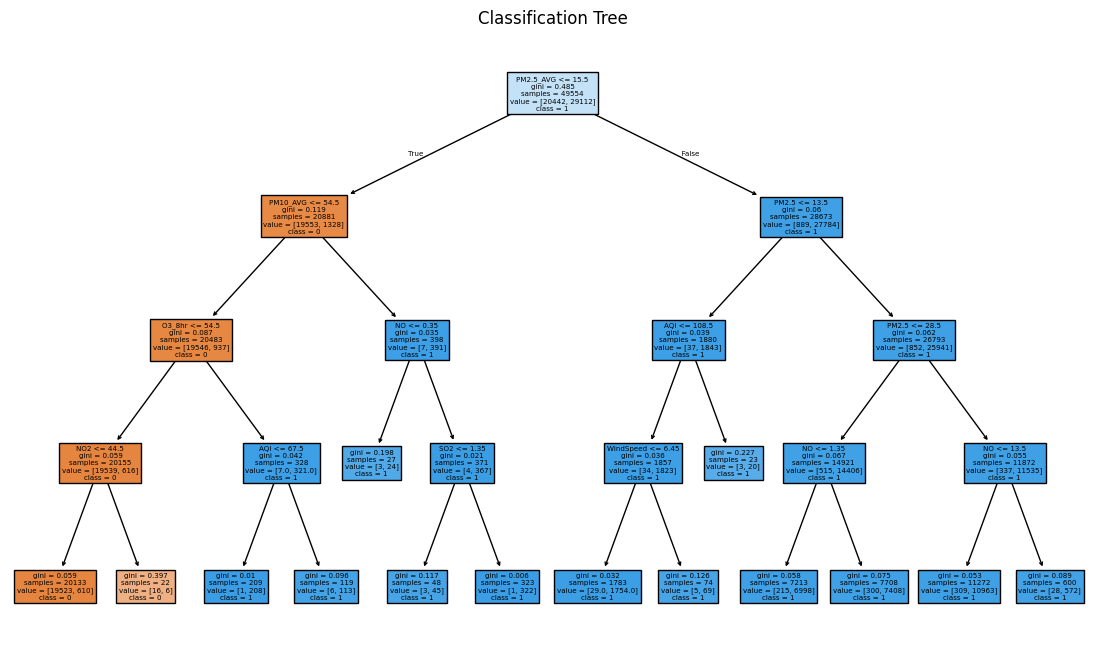

In [33]:
# 4. Predictions
y_pred = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred)

print("Classification Tree Accuracy:", acc_tree)

# 5. Plot the tree
plt.figure(figsize=(14, 8))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.title("Classification Tree")
plt.show()

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_features="sqrt", 
    random_state=1
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [35]:
print("Random Forest Accuracy:", acc_rf)

# Variable Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

Random Forest Accuracy: 0.9689236274602129


PM2.5_AVG    0.382925
AQI          0.247408
PM2.5        0.101420
PM10_AVG     0.091191
PM10         0.049933
O3_8hr       0.024709
CO_8hr       0.014346
CO           0.014103
O3           0.013604
NO2          0.010345
dtype: float64

## Variables importance 
Les variables les plus imporante c'est de `PM2.5_AVG`
AQI, PM25 et PM10_AVG qui sont les plus significatifs

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

boost_model = GradientBoostingClassifier(
    n_estimators=500,   # number of trees
    learning_rate=0.05,
    max_depth=2,       # small trees = weak learners
    random_state=1
)
boost_model.fit(X_train, y_train)
# Predictions
y_pred_boost = boost_model.predict(X_test)
acc_boost = accuracy_score(y_test, y_pred_boost)

print("Boosting Accuracy:", acc_boost)


Boosting Accuracy: 0.9689236274602129


Le model presente une precision de 96%. 

### Let's perform LinearRegression with most relevant variables